## Dados

In [17]:
# conjunto de dados de treinamento linear com pequeno ruido gaussiano

import numpy as np
import matplotlib.pyplot as plt

# numero de amostras
N = 50

# parametros da reta
a = 2
b = 3

# ruido gaussiano
mu = 0
sigma = 0.5

# gerando os dados
x = np.random.rand(N) * 10
y = a*x + b + np.random.normal(mu, sigma, N)

# Adicionando 10 outliers
x_out = np.random.rand(10) * 10 + 5
y_out = 10 + np.random.normal(mu, sigma, 10)

x_with_outlier = np.concatenate((x, x_out))
y_with_outlier = np.concatenate((y, y_out))

Text(0, 0.5, 'y')

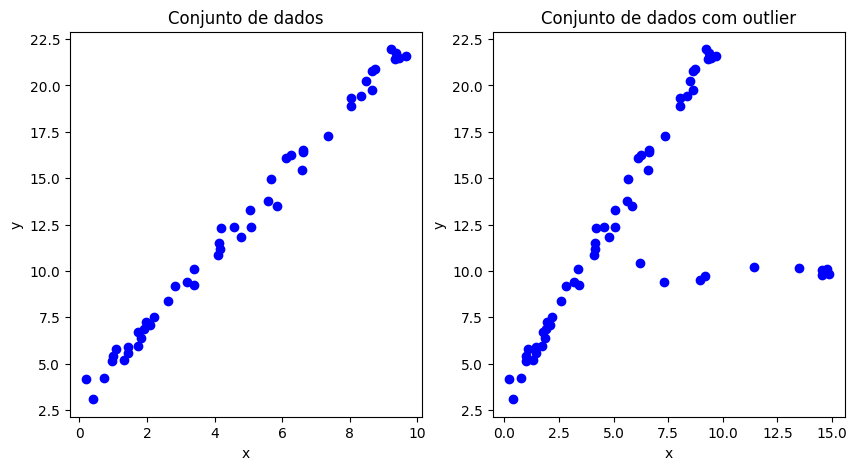

In [18]:
# plotando os dados
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

## Treinando os modelos

In [19]:
def linear_model(x, y):
    x = np.array(x)
    y = np.array(y)
    x = np.c_[np.ones(x.shape[0]), x]
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

In [20]:
# Modelo linear sem outlier
beta = linear_model(x, y)

# Modelo linear com outlier
beta_with_outlier = linear_model(x_with_outlier, y_with_outlier)

print ('Coeficientes do modelo sem outlier:', beta)
print ('Coeficientes do modelo com outlier:', beta_with_outlier)

Coeficientes do modelo sem outlier: [3.05654392 1.98607856]
Coeficientes do modelo com outlier: [7.46165604 0.77822015]


Text(0, 0.5, 'y')

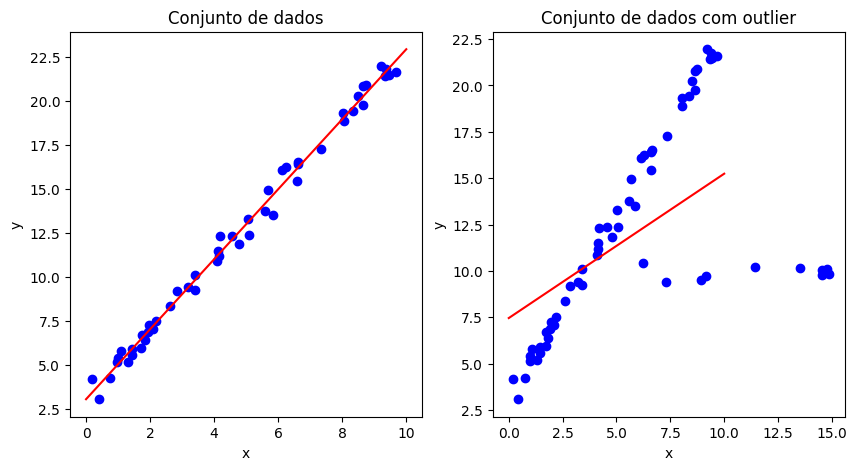

In [21]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


### Removendo os outliers

### Primeira forma: Batch

In [22]:
x_without_outlier = x_with_outlier[:-10]
y_without_outlier = y_with_outlier[:-10]

In [7]:
def gradient_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    Y = Y[:, np.newaxis]
    
    # Calcula o gradiente da perda com base nos coeficientes beta e no conjunto de dados X e Y
    gradient = 2 * X.T @ (X @ beta.T - Y)
    return gradient.T

def Hessian_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [8]:
w_star = np.array(beta_with_outlier)

# Coloca mais uma dimensão no vetor w_star
w_star = w_star[:, np.newaxis].T
lambda_val = 0.1
Delta = lambda_val * w_star * (len(x_with_outlier) - len(x_without_outlier)) + gradient_loss(w_star, x_with_outlier[-10:], y_with_outlier[-10:])

H_w_star_inv = np.linalg.inv(Hessian_loss(beta_with_outlier, x_with_outlier[:-10], y_with_outlier[:-10]))

w_minus = w_star + (H_w_star_inv @ Delta.T).T

In [9]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus)

Coeficientes do modelo treinando sem o outlier: [2.71019635 2.03085554]
Coeficientes do modelo treinando com o outlier: [6.99685041 0.9787703 ]
Coeficientes do modelo treinando com o outlier e depois removendo: [[3.01002334 1.98879632]]


Text(0, 0.5, 'y')

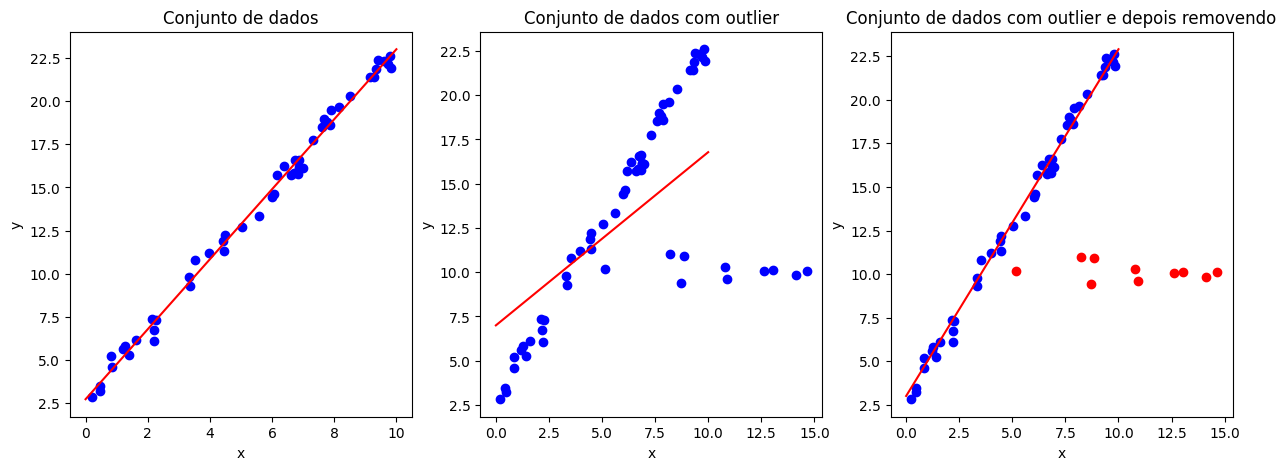

In [10]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')



### Segunda forma: Ponto a Ponto

In [23]:
def gradient_loss(beta, x_i, y_i):
    x_i = np.append(1, x_i)

    # Calcula o gradiente da perda para a amostra (x_i, y_i) com base nos coeficientes beta
    grad_loss = - 2 * (y_i - beta @ x_i) * x_i
    return grad_loss

def Hessian_loss(beta, X, Y):
    X = np.column_stack([np.ones(len(X)), X])
    
    # Calcula a Hessiana da perda com base nos coeficientes beta e no conjunto de dados X e Y
    Hessian = 2 * X.T @ X
    return Hessian

In [24]:
beta_with_outlier

array([7.46165604, 0.77822015])

In [25]:
x_with_outlier

array([ 9.45433086,  4.78468686,  5.07421053,  1.92322547,  5.83673129,
        5.67958967,  4.09783973,  9.37882447,  8.02293412,  0.9980182 ,
        4.56068093,  6.61267669,  3.38886799,  8.34488295,  4.16441736,
        1.96020891,  4.12806725,  9.2187311 ,  1.44200782,  8.64728829,
        6.12668109,  8.64263529,  2.6095598 ,  9.67086323,  6.59291812,
        1.83716594,  6.25548815,  4.18337432,  1.74476494,  2.19951785,
        0.97824213,  3.19173178,  6.62635605,  8.48861627,  1.73151838,
        8.74686987,  5.04417086,  0.4117993 ,  5.59429052,  2.84243335,
        1.0823588 ,  2.09842342,  0.19891465,  1.31625716,  8.04873193,
        7.34533948,  3.40452667,  9.33688387,  0.74281522,  1.44897588,
        8.93672973, 13.50148699, 14.86494358, 14.53065916,  9.16999488,
       11.41448374,  7.29277625,  6.21715548, 14.52080668, 14.78103739])

In [26]:
w_star = np.array(beta_with_outlier)
w_minus = w_star
n_remove = 10

for i in range(1, n_remove + 1): 
    lambda_val = 0.1
    Delta = lambda_val * w_minus + np.array([gradient_loss(w_minus, x_with_outlier[-i], y_with_outlier[-i])])

    H_w_star_inv = np.linalg.inv(Hessian_loss(w_minus, x_with_outlier[:-i], y_with_outlier[:-i]))

    w_minus = w_minus + (H_w_star_inv @ Delta.T).T

In [27]:
print ('Coeficientes do modelo treinando sem o outlier:', beta)
print ('Coeficientes do modelo treinando com o outlier:', beta_with_outlier)
print ('Coeficientes do modelo treinando com o outlier e depois removendo:', w_minus)

Coeficientes do modelo treinando sem o outlier: [3.05654392 1.98607856]
Coeficientes do modelo treinando com o outlier: [7.46165604 0.77822015]
Coeficientes do modelo treinando com o outlier e depois removendo: [[3.27120203 1.95366379]]


Text(0, 0.5, 'y')

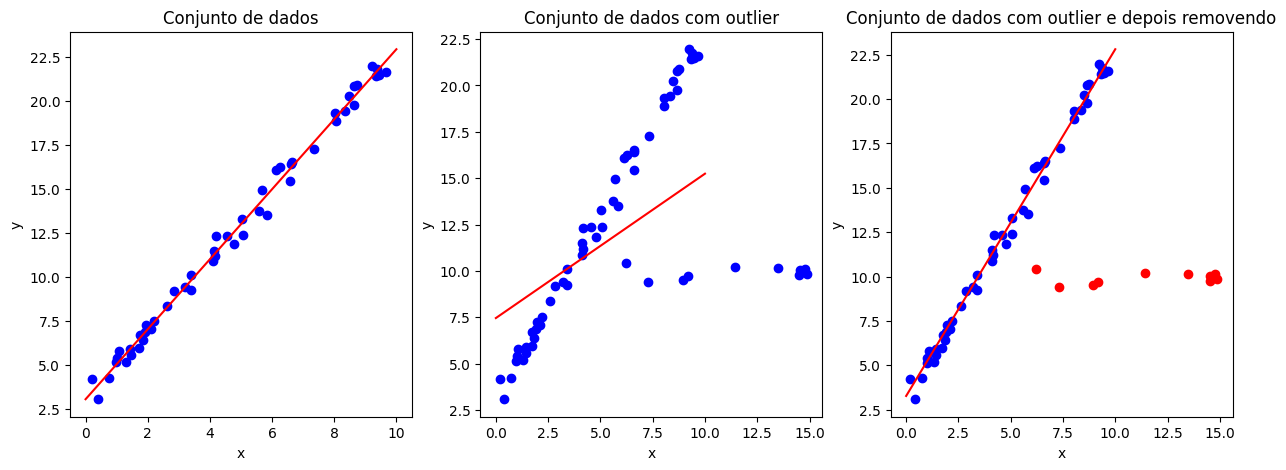

In [28]:
# plotando a reta

x_plot = np.linspace(0, 10, 100)
y_plot = beta[0] + beta[1]*x_plot
y_plot_with_outlier = beta_with_outlier[0] + beta_with_outlier[1]*x_plot
y_plot_minus = w_minus[0, 0] + w_minus[0, 1]*x_plot

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].scatter(x, y, color='blue')
ax[0].plot(x_plot, y_plot, color='red')
ax[0].set_title('Conjunto de dados')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].scatter(x_with_outlier, y_with_outlier, color='blue')
ax[1].plot(x_plot, y_plot_with_outlier, color='red')
ax[1].set_title('Conjunto de dados com outlier')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')


ax[2].scatter(x_with_outlier[-10:], y_with_outlier[-10:], color='red')
ax[2].scatter(x_without_outlier, y_without_outlier, color='blue')
ax[2].plot(x_plot, y_plot_minus, color='red')
ax[2].set_title('Conjunto de dados com outlier e depois removendo')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

